In [1]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [2]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [3]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
import pandas as pd

feature = pd.DataFrame(data['data'],columns=data['feature_names'])
target = pd.DataFrame(data['target'],columns=['target'])

df = pd.concat([feature,target],axis = 1)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


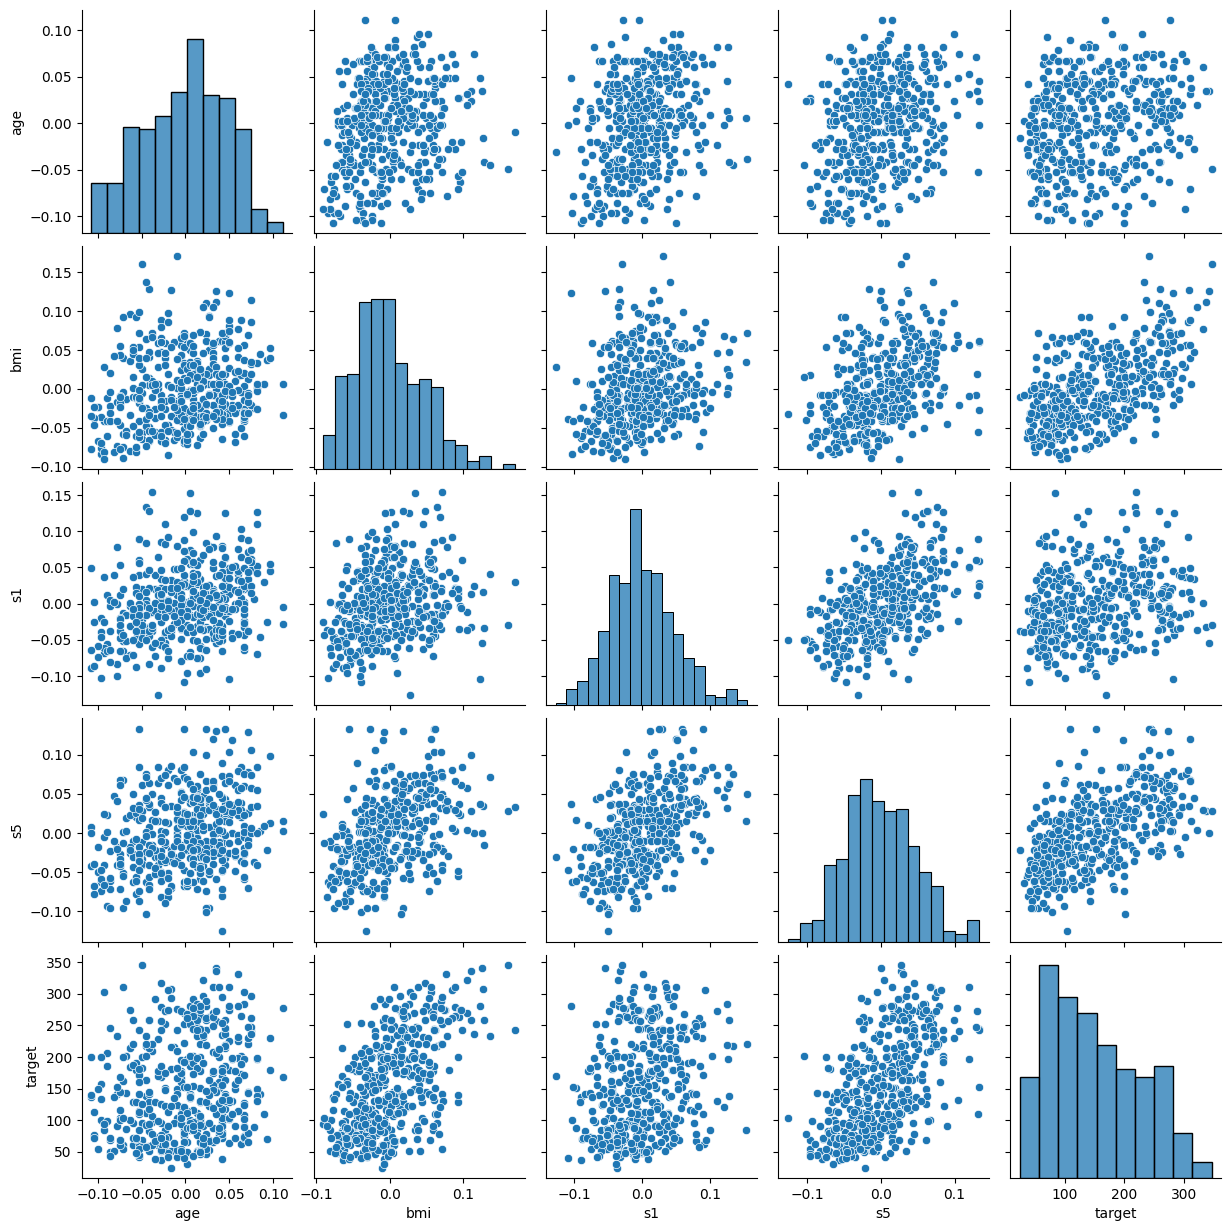

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['age','bmi','s1','s5','target']

sns.pairplot(df[cols])
plt.savefig('scatter.png',dpi = 300)

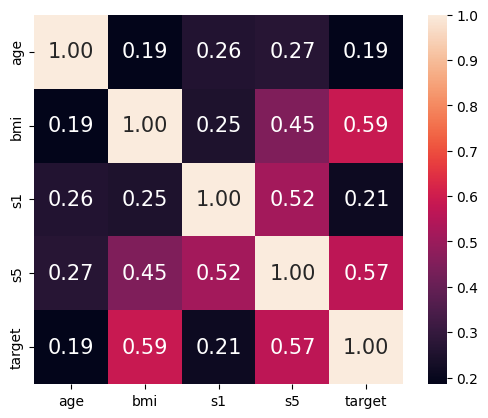

In [6]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)

hm = sns.heatmap(cm,
                 cbar=True,
                 annot= True,
                 square = True,
                 fmt='.2f',
                 annot_kws={'size':15},
                 yticklabels=cols,
                 xticklabels=cols)

In [7]:
from sklearn.model_selection import train_test_split

X,y = load_diabetes().data,load_diabetes().target
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=8)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

slr = LinearRegression()

slr.fit(X_train,y_train)
print(slr.coef_)     #因為有10個欄位，所以係數有10筆，為10次方程式
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

print('MSE train: %.3f,test: %.3f' %(
    mean_squared_error(y_train,y_train_pred),
    mean_squared_error(y_test,y_test_pred))
)
print('R^2 train: %.3f,test: %.3f'%(
    r2_score(y_train,y_train_pred),
    r2_score(y_test,y_test_pred))
)

[   11.51226671  -282.51443231   534.2084846    401.73037118
 -1043.90460259   634.92891045   186.43568421   204.94157943
   762.46336088    91.95399832]
MSE train: 2812.377,test: 3108.052
R^2 train: 0.530,test: 0.459


Ridge Regression 脊迴歸 = L1 norm

若想要模型簡單一點的話，就把alpha調大

當alpha = 0，就又變回原本的Linear Regression

y = theta 0 + theta 1 * x 

加上懲罰項，會降低斜率(theta 1)，使他更緩和一些 (這邊不考慮截距項 theta 0)

若training > testing :overfitting (太貼近訓練集的資料而失真)
  
  training < testing :underfitting

In [18]:
#Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1).fit(X_train,y_train)  #使用脊回歸(Ridge Regression)
print(ridge.coef_)

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print('MSE train: %.3f,test: %.3f' %(
    mean_squared_error(y_train,y_train_pred),
    mean_squared_error(y_test,y_test_pred))
)
print('R^2 train: %.3f,test: %.3f'%(
    r2_score(y_train,y_train_pred),
    r2_score(y_test,y_test_pred))
)

[  36.82662813  -75.80807883  282.42734567  207.39238457   -1.46557355
  -27.81684598 -134.37462416   98.97793127  222.67324438  117.97352343]
MSE train: 3397.726,test: 3262.231
R^2 train: 0.433,test: 0.433


In [20]:
#自動網點搜尋最佳 alpha 
from sklearn.linear_model import RidgeCV
rg = RidgeCV(alphas=(10,1.0,0.1,0.01,0.005,0.0025))
rg.fit(X_train,y_train)
rg.alpha_

0.0025

In [21]:
#Lasso
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1).fit(X_train,y_train)  #使用LASSO 最小絕對壓縮挑選機制
print(lasso.coef_)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print('MSE train: %.3f,test: %.3f' %(
    mean_squared_error(y_train,y_train_pred),
    mean_squared_error(y_test,y_test_pred))
)
print('R^2 train: %.3f,test: %.3f'%(
    r2_score(y_train,y_train_pred),
    r2_score(y_test,y_test_pred))
)

[  0.          -0.         384.73866871  72.69163139   0.
   0.          -0.           0.         247.88294779   0.        ]
MSE train: 3818.213,test: 3646.831
R^2 train: 0.362,test: 0.366


In [22]:
#自動網點搜尋最佳 alpha 
from sklearn.linear_model import LassoCV
rg = LassoCV(alphas=(10,1.0,0.1,0.01,0.005,0.0025))
rg.fit(X_train,y_train)
rg.alpha_

0.1

彈性網(Elastic Net) = L1 norm + L2 norm

In [23]:
#Elastic Net
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1,l1_ratio=0.5).fit(X_train,y_train)  #l1_ratio 即為 LASSO
print(elanet.coef_)

y_train_pred = elanet.predict(X_train)
y_test_pred = elanet.predict(X_test)

print('MSE train: %.3f,test: %.3f' %(
    mean_squared_error(y_train,y_train_pred),
    mean_squared_error(y_test,y_test_pred))
)
print('R^2 train: %.3f,test: %.3f'%(
    r2_score(y_train,y_train_pred),
    r2_score(y_test,y_test_pred))
)

[ 0.21886058  0.          3.32172624  2.40901226  0.39329602  0.08134696
 -1.66664417  1.86756939  3.01133497  1.88112417]
MSE train: 5937.607,test: 5704.626
R^2 train: 0.009,test: 0.008
